In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import random

In [3]:
class entity:
    
    def __init__(self, canvas, radius=3, color=(0,0,0)):
        self.p1 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.p2 = (random.randint(0, canvas.shape[0]), random.randint(0, canvas.shape[1]))
        self.radius  = radius
        self.color = color
    
    
class tableau:
    
    def __init__(self, shape, color=(255,255,255)):    
        self.canvas = np.ones((shape[0], shape[1], 3))*np.array(color)
        
    def display_with(self, entities):
        temp_canvas = np.copy(self.canvas)
        for entity in entities:
            temp_canvas = cv2.line(temp_canvas, entity.p1, entity.p2, entity.color, entity.radius) 
        end_result = temp_canvas.astype(int)
        plt.imshow(end_result)
        return end_result

In [4]:
tableau1 = tableau([224,224], color=(200,200,200))

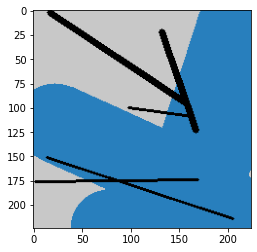

In [36]:
entities = []
color1 = (40, 127, 189)
entities.append(entity(tableau1.canvas, radius=80, color=color1))
entities.append(entity(tableau1.canvas, radius=100, color=color1))
entities.append(entity(tableau1.canvas, radius=80, color=color1))
entities.append(entity(tableau1.canvas, radius=2))
entities.append(entity(tableau1.canvas, radius=2))
entities.append(entity(tableau1.canvas, radius=2))
entities.append(entity(tableau1.canvas, radius=5))
entities.append(entity(tableau1.canvas, radius=5))


tableau1.display_with(entities)
pass